# [AIFFEL_Going Deeper_1] 나랑 닮은 연예인은 누구?

## 프로젝트 내용
얼굴 임베딩 벡터를 구하여 나와 닮은 연예인이 누구인지 찾아보기 

## 목차
#### 1. 얼굴 임베딩 벡터로 나와 닮은 연예인 찾기     
- Step 1. 필요한 라이브러리 불러오기    
- Step 2. 사진 모으기      
2-1. 내 사진 불러오기 및 출력     
2-2. 연예인 사진 불러오기 및 출력    
- Step 3. 얼굴 영역 자르기    
3-1. 방법 1. 얼굴 영역만 crop하기    
3-2. 방법 2. 보다 편리하게 함수로 만들어 주기     
3-3. crop한 이미지 PIL로 저장하기     
- Step 4. 얼굴 영역의 임베딩 추출하기    
4-1. 얼굴 임베딩 벡터 구하기   
4-2. 임베딩 벡터 구해 dict 구조에 담는 함수 만들기      
- Step 5. 연예인들과 임베딩 벡터 비교하기      
5-1. 두 임베딩 벡터간 거리 계산하는 함수 만들기     
5-2. 가장 닮은꼴 얼굴 찾아보기      
- Step 6. 다양한 재미있는 시각화 시도해보기    
6-1. 안경을 쓰면 어떨까?     
6-2. 10순위까지 출력후 임베딩 거리 그래프로 표현해 보기    
6-3. 종합적으로 나와 임베딩 거리 0.5 이내인 연예인은 누구?

#### 2. 결론
#### 3. 루브릭 관련 고려한 점
#### 4. 탐구 및 시도 모음      
#### 5. 회고      
#### 6. References     

## 글씨 색 표시
### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

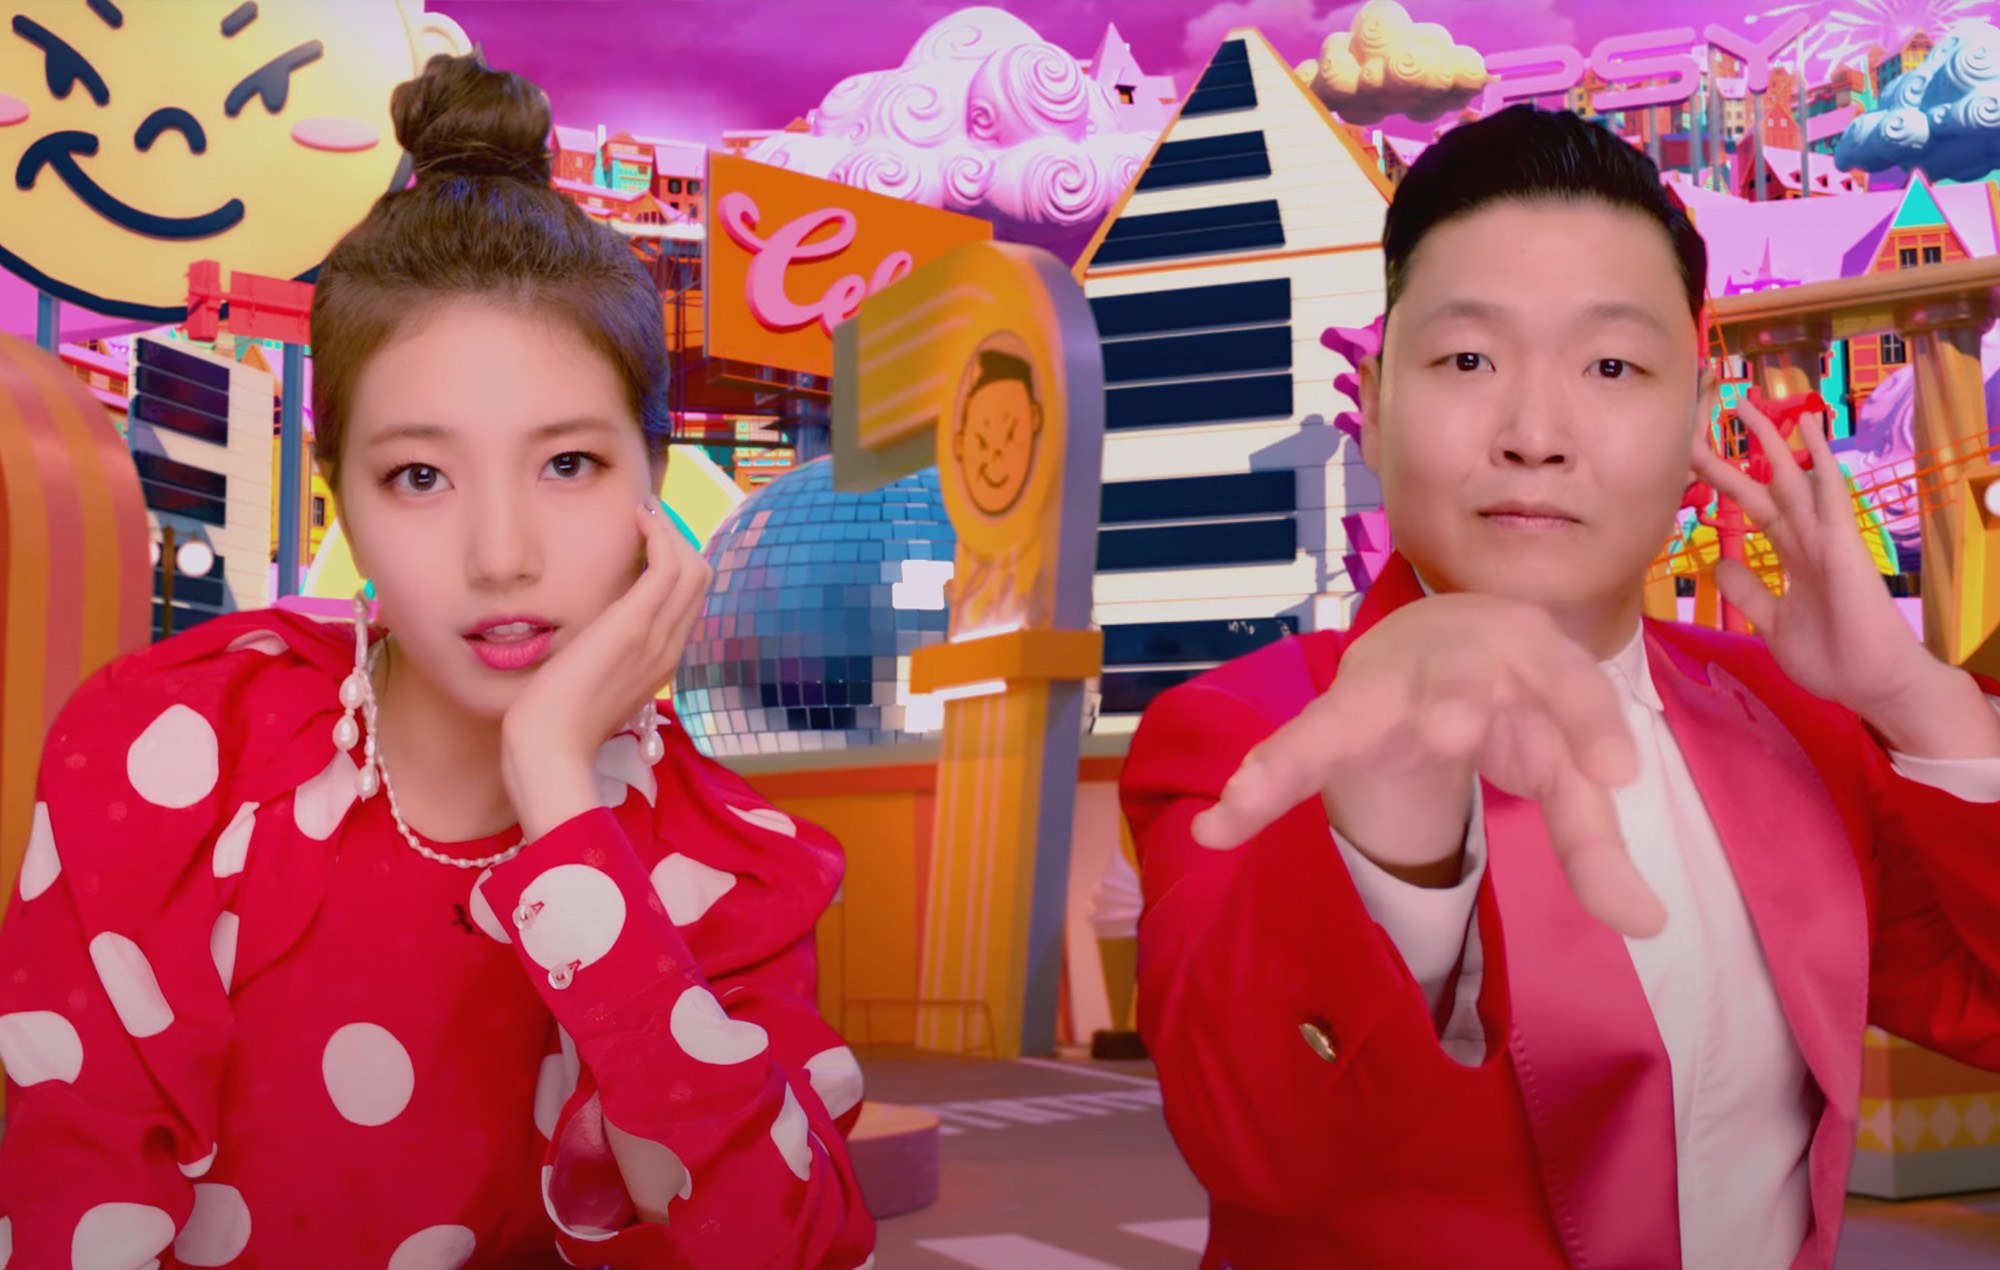

In [3]:
Image("[GD_1_Celeb] images/01.jpg")

# 1. 얼굴 임베딩 벡터로 나와 닮은 연예인 찾기
### Step 1. 필요한 라이브러리 불러오기

In [59]:
import face_recognition
import numpy as np
import PIL
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img


print(face_recognition.__version__)
print(numpy.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


In [3]:
!pip install IPython # 주피터에 이미지를 넣기 위해 패키지 설치 
from IPython.display import Image

### Step 2. 사진 모으기
### Step 2-1. 내 사진 불러오기 및 출력

In [143]:
dir_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images_me_2'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['노근아_4.jpg', '노근아_2.jpg']


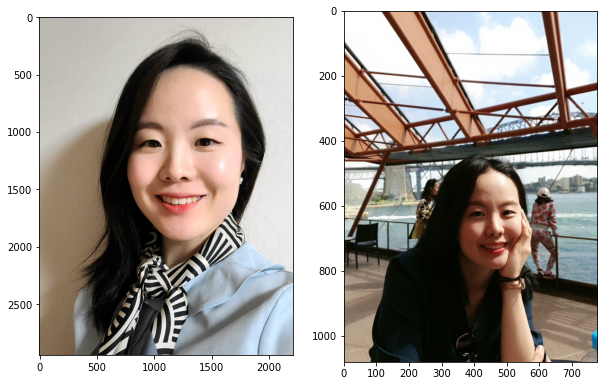

In [144]:
# 이미지 출력하기

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

### Step 2-2. 연예인 사진 불러오기 및 출력

In [146]:
dir_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['이영하.jpg', '오재원.jpg', '김고은.jpeg', '여자아이들수진.jpeg', '온앤오프와이엇.jpg', '손예진.jpeg', '화사.jpg', '이제훈.jpeg', '존 파브르.jpeg', '우기.jpg', '노홍철.jpeg', '수호.jpg', '장원준.jpeg', '박진영.jpeg', '이근대위.jpeg', '대도서관.jpeg', '차범근.jpeg', '서현진.jpg', '티모시 달튼.jpeg', '안재홍.jpg', '윤아.jpg', '이동국.jpeg', '성시경.jpg', '최민식.jpg', '티파니.jpg', '스윙스.jpeg', '이범수.jpeg', '정우성.jpeg', '조승우.jpeg', '크리스 에반스.jpg', '찬열.jpeg', '솔라.jpg', '아이즈원조유리.jpeg', '노근아_5.jpg', '류승룡.jpeg', '승희.jpeg', '트와이스정연.jpg', '문별.jpg', '곽도원.jpg', '유지태.jpg', '꽈두룹.jpeg', '주호민.jpeg', '이승환.jpg', '기성용.jpg', '김종서.jpg', '최양락.jpg', '공유.jpg', '신동엽.jpg', 'biden.jpg', '잭 블랙.jpeg', '김연우.jpeg', '제프리 힌턴.jpg', '박보검.jpg', '박희순.jpg', '지코.jpg', '유재석.jpg', '홍구.jpg', '박재범.jpg', '태양.jpeg', '권태원.jpeg', '매드클라운.jpeg', '택연.jpg', '조이.jpg', '문재인.jpeg', '유아.jpg', '조정치.jpg', '사쿠라.jpg', '방시혁.jpeg', '류준열.jpg', '정형돈.jpg', '트와이스쯔위.jpg', '씨잼.jpg', '심수창.jpeg', 'clinton.jpeg', '하현우.jpg', '로제.jpg', '김현수.jpeg', '노근아_4.jpg', '김대중.jpg', '장도연.jpg', '케빈 스페이시.jpeg', '김희철.jpg', '리사.jpg', '김영삼.jpeg'

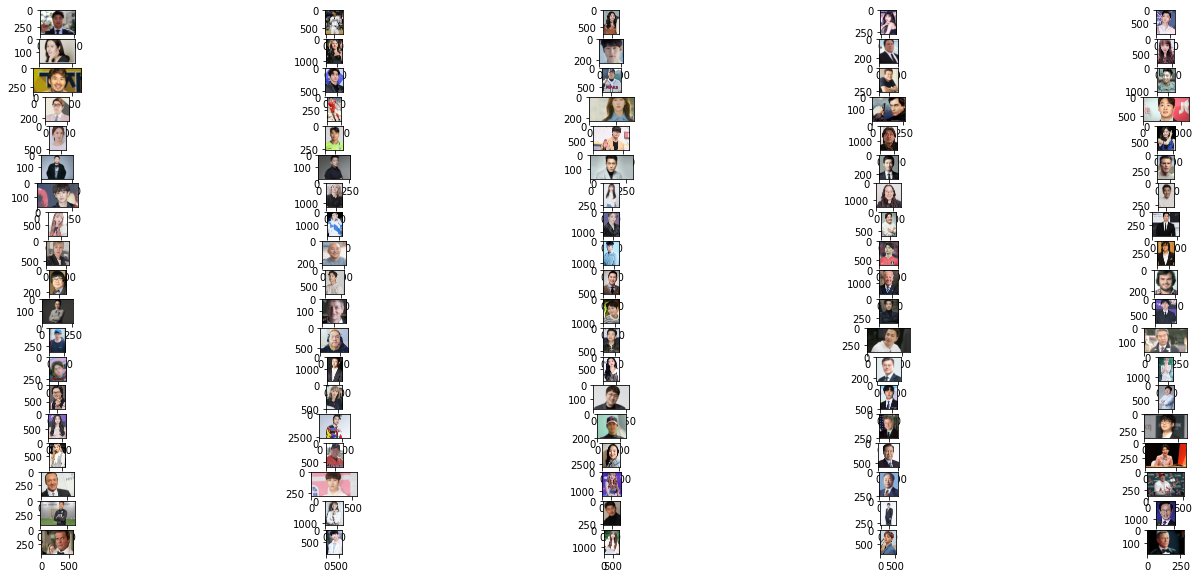

In [74]:
fig, axes = plt.subplots(nrows=19, ncols=5, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

In [147]:
len(file_list)

267

### <span style = "color:red;">연예인 사진을 불러오며...</span>
**1. fig, axes = plt.subplots(nrows=19, ncols=5, figsize=(24,10))에서**

원래의 사진 개수(267장)에 맞게 출력하려면 nrows=89, ncols=3으로 맞춰줘야하는데,      
figsize를 바꾸지 않고 출력해보니 너무 작게 나와 일부만 출력했다.     

**2. 수작업으로 파일 업로드**

압축파일을 업로드 한 다음, shell에서 unzip을 했는데    
FileNotFoundError: [Errno 2] No such file or directory: '/aiffel/aiffel/project/first-repository/face_embedding_images/images2/celebrity_without_png.zip'     
에러가 났다.
        
또는     
TypeError: stat: path should be string, bytes, os.PathLike or integer, not list    
이런 에러도.. 자료구조와 관련된걸까...?

그래서 수작업으로 업로드

**3. png 파일이 이후 작업하다 에러가 나서 jpg만 추려서 업로드**

에러내용

Traceback (most recent call last):

  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)

  File "/tmp/ipykernel_31/1350945611.py", line 3, in <module>
    image = img.imread(dir_path+'/'+file_list[i])

  File "/opt/conda/lib/python3.9/site-packages/matplotlib/image.py", line 1501, in imread
    with img_open(fname) as image:

  File "/opt/conda/lib/python3.9/site-packages/PIL/ImageFile.py", line 121, in __init__
    self._open()

  File "/opt/conda/lib/python3.9/site-packages/PIL/PngImagePlugin.py", line 676, in _open
    raise SyntaxError("not a PNG file")

  File "<string>", line unknown
SyntaxError: not a PNG file

### Step 3. 얼굴 영역 자르기
### Step 3-1. 방법 1. 얼굴 영역만 crop하기

[(741, 1763, 1891, 613)]


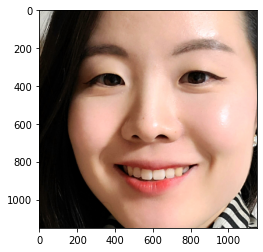

In [76]:
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/노근아_4.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역 좌표를 출력

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

### Step 3-2. 방법 2. 보다 편리하게 함수로 만들어주기

In [77]:
# get_cropped_face라는 함수 정의

def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

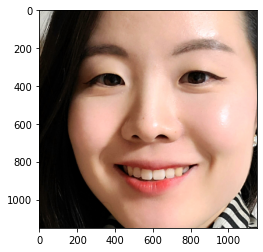

In [78]:
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/노근아_4.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### <span style = "color:red;">image_path에 정확한 사진 링크를 넣어야 한다.</span>

image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6'     
이렇게 넣으면.. 디렉토리 에러가 난다

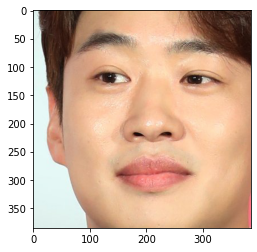

In [80]:
# 다른 연예인 사진 출력해보기
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/안재홍.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### Step 3-3. crop한 이미지 PIL로 저장하기

In [82]:
from PIL import Image
face = get_cropped_face(image_path)

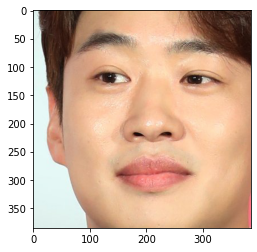

In [83]:
plt.imshow(face)

In [84]:
pillow_image = Image.fromarray(face)

In [85]:
path_to_save = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/cropped_face_images/안재홍.jpg'
#path_to_save 변수로 새로 설정하고 저장 성공!

pillow_image.save(path_to_save)

### <span style = "color:orange;">PIL이란? PIL로 저장하려면?</span>


LMS - Reference 노드 - 2. 파이썬으로 이미지 다루기 - 2-3의 내용을 정리해보면     

- PIL은 파이썬에서 이미지 처리를 위해 있었던 Python image library이다.
- 2011년 이후 개발이 중단되고 이를 Pillow가 이어 받았다.
- 간단한 이미지 작업에 필로우는 넘파이와 결합하여 간편하게 사용할 수 있는 도구이다.
- 이미지는 배열 형태의 데이터

**- 넘파이로 배열을 만든 다음에 PIL.Image.fromarray()를 통해 이미지 객체로 변환 뒤 화면에 표시할 수 있다.**     
예:      
data = np.zeros([32, 32, 3], dtype=np.uint8)     
image = Image.fromarray(data, 'RGB')     
image     


**- 이미지를 저장할 때에는 경로를 적어주어야 한다.**      
예:      
new_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/jpg_pillow_practice.jpg'     
img = img.convert('RGB')     
img.save(new_image_path)

### Step 4. 얼굴 영역의 임베딩 추출하기
### Step 4-1. 얼굴 임베딩 벡터 구하기 

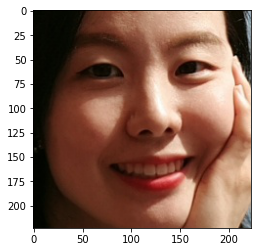

In [86]:
# 내 사진으로 구해보기

image_file = os.path.join(dir_path, '노근아_2.jpg')
face = get_cropped_face(image_file)  

plt.imshow(face)

In [87]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수 정의
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


# 노근아_2에 대한 임베딩 벡터
embedding = get_face_embedding(face)  
embedding

[array([-0.05932966,  0.06160345,  0.00627404, -0.10749774, -0.11710783,
        -0.01344268, -0.02535694, -0.1389187 ,  0.13554621, -0.1388597 ,
         0.23695391, -0.10186599, -0.19896229, -0.07500625, -0.06697973,
         0.19347315, -0.20994745, -0.1730715 , -0.07649361, -0.0046889 ,
         0.10912941,  0.0016783 , -0.05153423,  0.03472769, -0.0873206 ,
        -0.35172433, -0.13620289, -0.01360611,  0.0195254 , -0.09137528,
        -0.02099013,  0.03559599, -0.2490205 , -0.03754783,  0.00684163,
         0.05706972, -0.02588834, -0.15765119,  0.1208005 , -0.01207954,
        -0.25227755,  0.05712254,  0.08688655,  0.2093771 ,  0.16575433,
        -0.03022426,  0.00524672, -0.15054551,  0.1133639 , -0.16053964,
        -0.00158631,  0.16725297,  0.02281253,  0.04398777,  0.01281025,
        -0.09023058,  0.00310052,  0.16495253, -0.12663253,  0.02790621,
         0.12199314, -0.08962431, -0.03126762, -0.18145096,  0.16438018,
         0.06616297, -0.11356709, -0.25057465,  0.1

### Step 4-2. 임베딩 벡터 구해 dict 구조에 담는 함수 만들기

In [88]:
dir_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6'

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        print(file)
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담긴다고 한다(주석 출처_노드) 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

embedding_dict = get_face_embedding_dict(dir_path)

이영하.jpg
오재원.jpg
김고은.jpeg
여자아이들수진.jpeg
온앤오프와이엇.jpg
손예진.jpeg
화사.jpg
이제훈.jpeg
존 파브르.jpeg
우기.jpg
노홍철.jpeg
수호.jpg
장원준.jpeg
박진영.jpeg
이근대위.jpeg
대도서관.jpeg
차범근.jpeg
서현진.jpg
티모시 달튼.jpeg
안재홍.jpg
윤아.jpg
이동국.jpeg
성시경.jpg
최민식.jpg
티파니.jpg
스윙스.jpeg
이범수.jpeg
정우성.jpeg
조승우.jpeg
크리스 에반스.jpg
찬열.jpeg
솔라.jpg
아이즈원조유리.jpeg
노근아_5.jpg
류승룡.jpeg
승희.jpeg
트와이스정연.jpg
문별.jpg
곽도원.jpg
유지태.jpg
꽈두룹.jpeg
주호민.jpeg
이승환.jpg
기성용.jpg
김종서.jpg
최양락.jpg
공유.jpg
신동엽.jpg
biden.jpg
잭 블랙.jpeg
김연우.jpeg
제프리 힌턴.jpg
박보검.jpg
박희순.jpg
지코.jpg
유재석.jpg
홍구.jpg
박재범.jpg
태양.jpeg
권태원.jpeg
매드클라운.jpeg
택연.jpg
조이.jpg
문재인.jpeg
유아.jpg
조정치.jpg
사쿠라.jpg
방시혁.jpeg
류준열.jpg
정형돈.jpg
트와이스쯔위.jpg
씨잼.jpg
심수창.jpeg
clinton.jpeg
하현우.jpg
로제.jpg
김현수.jpeg
노근아_4.jpg
김대중.jpg
장도연.jpg
케빈 스페이시.jpeg
김희철.jpg
리사.jpg
김영삼.jpeg
김광현.jpg
조원희.jpg
공효진.jpg
김민재.jpeg
장성호.jpeg
이명박.jpg
로저 무어.jpeg
온앤오프라운.jpg
케이.jpg
첸.jpg
다니엘 크레이그.jpeg
레인보우재경.jpg
트와이스나연.jpg
황정민.jpg
트와이스모모.jpeg
마동석.jpeg
김학범.jpg
유해진.jpg
딕헌터.jpeg
차명석.jpg
류승범.jpg
잭 스페이더.jpeg
온앤오프효진.jpg
로다주.jpeg
한효주.jpg
손흥민.jpg
김대명.jpeg
이승기.jpeg
bush.

### <span style = "color:red;">도움받은 부분, print(file)</span>

for문 안에 print(file)을 넣어 어떻게 진행되고 있는지 확인할 수 있다.     
그래서 face_recognition.face_locations에서 에러가 있는 '산들' 이미지를 찾을 수 있었다.     

In [89]:
embedding_dict['안재홍']

array([-0.11994135,  0.08737228,  0.05457496, -0.01726107, -0.10591864,
       -0.04317693, -0.06167354, -0.11176828,  0.06236308, -0.09201173,
        0.1842164 , -0.05389832, -0.19215943, -0.07170091, -0.06788103,
        0.15836206, -0.11190213, -0.12003154, -0.00841498,  0.0038773 ,
        0.12090733, -0.02674349, -0.01104647,  0.0332809 , -0.0541886 ,
       -0.30355021, -0.10629398, -0.07627601,  0.01664577, -0.00399772,
       -0.08162578,  0.01164294, -0.19420204, -0.08730193,  0.02532906,
        0.07991826,  0.00257449, -0.07309629,  0.14153519,  0.01956252,
       -0.17441171,  0.03895441,  0.02697005,  0.26007745,  0.17851646,
        0.04287498,  0.05354946, -0.11624034,  0.11510982, -0.13927193,
        0.04303888,  0.15150471,  0.13034371,  0.06000423, -0.00712413,
       -0.12889822,  0.0777548 ,  0.10824507, -0.14693525,  0.05340138,
        0.11834811, -0.03241916, -0.00496655, -0.11084698,  0.26516038,
        0.06948635, -0.13258892, -0.15417238,  0.1380409 , -0.11

### Step 5. 연예인들과 임베딩 벡터 비교하기 
### Step 5-1. 두 임베딩 벡터간 거리 계산하는 함수 만들기

In [90]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

#### 내 사진들간의 임베딩 벡터간 거리 구해보기

In [91]:
get_distance('노근아_2', '노근아_4')

0.2965395269201019

#### <span style = "color:red;">임베딩 벡터간 거리가 작을수록 같은 사람일 확률이 높다.</span>

### Step 5-2. 가장 닮은꼴 얼굴 찾아보기

In [92]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 한다(주석 출처_노드)
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [93]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외(주석 출처_노드)
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [135]:
get_nearest_face('노근아_2')

순위 1 : 이름(노근아_4), 거리(0.2965395269201019)
순위 2 : 이름(트와이스사나), 거리(0.40796800553221396)
순위 3 : 이름(트와이스모모), 거리(0.4085972674219029)
순위 4 : 이름(아이유), 거리(0.41250992059636243)
순위 5 : 이름(장도연), 거리(0.41893456062475176)


In [97]:
get_nearest_face('노근아_4')

순위 1 : 이름(노근아_2), 거리(0.2965395269201019)
순위 2 : 이름(노근아_5), 거리(0.3638023128504504)
순위 3 : 이름(손예진), 거리(0.3838754703963807)
순위 4 : 이름(지수), 거리(0.3928444849189283)
순위 5 : 이름(장원영), 거리(0.4065896434883224)


In [130]:
get_nearest_face('안재홍')

순위 1 : 이름(손흥민), 거리(0.3814667058222003)
순위 2 : 이름(배성재), 거리(0.3852747295152812)
순위 3 : 이름(정수빈), 거리(0.3914592995227464)
순위 4 : 이름(이영하), 거리(0.40628440946196187)
순위 5 : 이름(철면수심), 거리(0.4199991426744338)


### Step 6. 다양한 재미있는 시각화 시도해보기
### Step 6-1. 안경을 쓰면 어떨까?

#### 안경 쓰지 않은 사진_1

In [135]:
get_nearest_face('노근아_2')

순위 1 : 이름(노근아_4), 거리(0.2965395269201019)
순위 2 : 이름(트와이스사나), 거리(0.40796800553221396)
순위 3 : 이름(트와이스모모), 거리(0.4085972674219029)
순위 4 : 이름(아이유), 거리(0.41250992059636243)
순위 5 : 이름(장도연), 거리(0.41893456062475176)


In [124]:
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/노근아_2.jpg'
cropped_face_2_1 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/트와이스사나.jpg'
cropped_face_2_2 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/트와이스모모.jpeg'
cropped_face_2_3 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/아이유.jpg'
cropped_face_2_4 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/장도연.jpg'
cropped_face_2_5 = get_cropped_face(image_path)

(-0.5, 88.5, 89.5, -0.5)

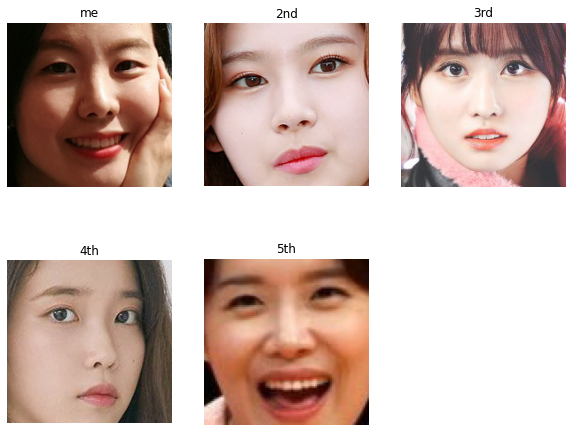

In [123]:
plt.figure(figsize=(10,8))
plt.subplot(231)
plt.imshow(cropped_face_2_1)
plt.title('me')
plt.axis('off')
plt.subplot(232)
plt.imshow(cropped_face_2_2)
plt.title('2nd')
plt.axis('off')
plt.subplot(233)
plt.imshow(cropped_face_2_3)
plt.title('3rd')
plt.axis('off')
plt.subplot(234)
plt.imshow(cropped_face_2_4)
plt.title('4th')
plt.axis('off')
plt.subplot(235)
plt.imshow(cropped_face_2_5)
plt.title('5th')
plt.axis('off')

#### 안경 쓰지 않은 사진_2

In [126]:
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/노근아_4.jpg'
cropped_face_4_1 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/노근아_5.jpg'
cropped_face_4_2 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/손예진.jpeg'
cropped_face_4_3 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/지수.jpg'
cropped_face_4_4 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/장원영.jpeg'
cropped_face_4_5 = get_cropped_face(image_path)

(-0.5, 74.5, 73.5, -0.5)

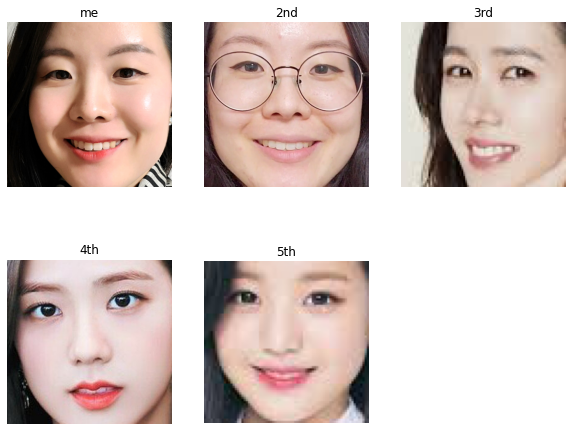

In [127]:
plt.figure(figsize=(10,8))
plt.subplot(231)
plt.imshow(cropped_face_4_1)
plt.title('me')
plt.axis('off')
plt.subplot(232)
plt.imshow(cropped_face_4_2)
plt.title('2nd')
plt.axis('off')
plt.subplot(233)
plt.imshow(cropped_face_4_3)
plt.title('3rd')
plt.axis('off')
plt.subplot(234)
plt.imshow(cropped_face_4_4)
plt.title('4th')
plt.axis('off')
plt.subplot(235)
plt.imshow(cropped_face_4_5)
plt.title('5th')
plt.axis('off')

#### 안경 쓴 사진

In [102]:
get_nearest_face('노근아_5')

순위 1 : 이름(노근아_4), 거리(0.3638023128504504)
순위 2 : 이름(노근아_2), 거리(0.46671145762524446)
순위 3 : 이름(서현진), 거리(0.5004278554425166)
순위 4 : 이름(장도연), 거리(0.5028533438438588)
순위 5 : 이름(박나래), 거리(0.5112536908103582)


In [129]:
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/노근아_5.jpg'
cropped_face_5_1 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/노근아_2.jpg'
cropped_face_5_2 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/서현진.jpg'
cropped_face_5_3 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/장도연.jpg'
cropped_face_5_4 = get_cropped_face(image_path)
image_path = os.getenv('HOME')+'/aiffel/project/first-repository/face_embedding_images/images6/박나래.jpeg'
cropped_face_5_5 = get_cropped_face(image_path)

(-0.5, 50.5, 51.5, -0.5)

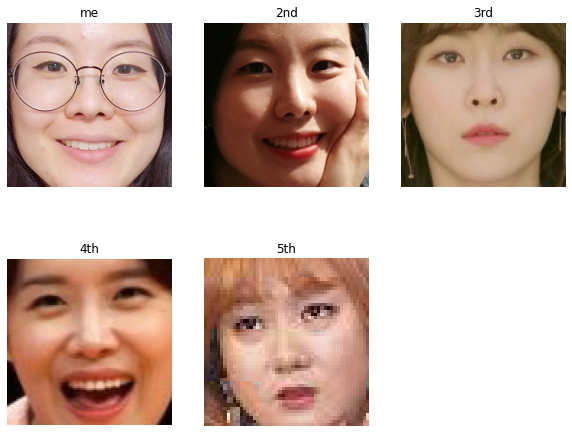

In [131]:
plt.figure(figsize=(10,8))
plt.subplot(231)
plt.imshow(cropped_face_5_1)
plt.title('me')
plt.axis('off')
plt.subplot(232)
plt.imshow(cropped_face_5_2)
plt.title('2nd')
plt.axis('off')
plt.subplot(233)
plt.imshow(cropped_face_5_3)
plt.title('3rd')
plt.axis('off')
plt.subplot(234)
plt.imshow(cropped_face_5_4)
plt.title('4th')
plt.axis('off')
plt.subplot(235)
plt.imshow(cropped_face_5_5)
plt.title('5th')
plt.axis('off')

### Step 6-1. 결론
1. 안경을 쓴 경우와 쓰지 않은 경우 결과가 다르게 나온다. 
2. 안경을 쓰지 않은 두 개의 사진의 경우에도 닮은 연예인이 다르게 나온다.

### Step 6-2. 10순위까지 출력후 임베딩 거리 그래프로 표현해 보기

In [151]:
# 10순위까지 출력할 함수로 기존 함수 수정하기
def get_nearest_face_10(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외(주석 출처_노드)
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [160]:
# 그래프 그릴 맷플롯립과 폰트 불러오기

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


In [153]:
get_nearest_face_10('노근아_2')

순위 1 : 이름(노근아_4), 거리(0.2965395269201019)
순위 2 : 이름(트와이스사나), 거리(0.40796800553221396)
순위 3 : 이름(트와이스모모), 거리(0.4085972674219029)
순위 4 : 이름(아이유), 거리(0.41250992059636243)
순위 5 : 이름(장도연), 거리(0.41893456062475176)
순위 6 : 이름(사쿠라), 거리(0.42366451927776816)
순위 7 : 이름(RM), 거리(0.4260489707743963)
순위 8 : 이름(제이홉), 거리(0.42605155351413404)
순위 9 : 이름(케이), 거리(0.4288543671678471)
순위 10 : 이름(이종석), 거리(0.43042355890420797)


#### 그래프로 그리기 위해 판다스 데이터 프레임으로 만들어주기

In [156]:
import pandas as pd

chart_1 = pd.DataFrame({'이름':['노근아_4', '트와이스사나', '트와이스모모', '아이유', '장도연', '사쿠라', 'RM', '제이홉', '케이', '이종석'],
                             '얼굴 임베딩 벡터간 거리':[0.2965395269201019, 0.40796800553221396, 0.4085972674219029, 0.41250992059636243, 0.41893456062475176, 0.42366451927776816, 0.4260489707743963, 0.42605155351413404, 0.4288543671678471, 0.43042355890420797]})
chart_1

,이름,얼굴 임베딩 벡터간 거리
0,노근아_4,0.296540
1,트와이스사나,0.407968
2,트와이스모모,0.408597
3,아이유,0.412510
4,장도연,0.418935
5,사쿠라,0.423665
6,RM,0.426049
7,제이홉,0.426052
8,케이,0.428854
9,이종석,0.430424


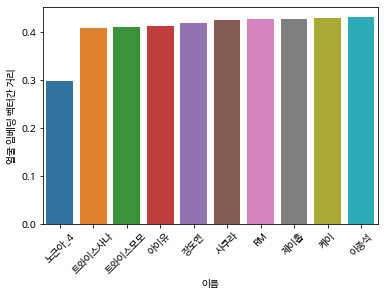

In [164]:
ax = sns.barplot(data=chart_1, x='이름', y='얼굴 임베딩 벡터간 거리')
containers = ax.containers[0]
plt.xticks(rotation=45)
plt.show()

In [154]:
get_nearest_face_10('노근아_4')

순위 1 : 이름(노근아_2), 거리(0.2965395269201019)
순위 2 : 이름(노근아_5), 거리(0.3638023128504504)
순위 3 : 이름(손예진), 거리(0.3838754703963807)
순위 4 : 이름(지수), 거리(0.3928444849189283)
순위 5 : 이름(장원영), 거리(0.4065896434883224)
순위 6 : 이름(장도연), 거리(0.4071291004332894)
순위 7 : 이름(트와이스사나), 거리(0.40799448022771134)
순위 8 : 이름(케이), 거리(0.4094288693571574)
순위 9 : 이름(진), 거리(0.4099241510408035)
순위 10 : 이름(리아), 거리(0.41503188498934157)


In [157]:
chart_2 = pd.DataFrame({'이름':['노근아_2', '노근아_5', '손예진', '지수', '장원영', '장도연', '트와이스사나', '케이', '진', '리아'],
                             '얼굴 임베딩 벡터간 거리':[0.2965395269201019, 0.3638023128504504, 0.3838754703963807, 0.3928444849189283, 0.4065896434883224, 0.4071291004332894, 0.40799448022771134, 0.4094288693571574, 0.4099241510408035, 0.41503188498934157]})
chart_2

,이름,얼굴 임베딩 벡터간 거리
0,노근아_2,0.296540
1,노근아_5,0.363802
2,손예진,0.383875
3,지수,0.392844
4,장원영,0.406590
5,장도연,0.407129
6,트와이스사나,0.407994
7,케이,0.409429
8,진,0.409924
9,리아,0.415032


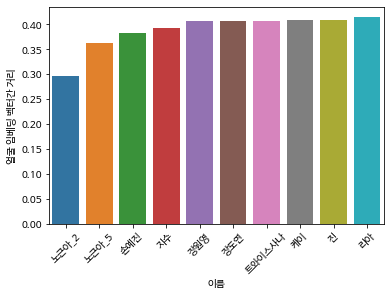

In [165]:
ax = sns.barplot(data=chart_2, x='이름', y='얼굴 임베딩 벡터간 거리')
containers = ax.containers[0]
plt.xticks(rotation=45)
plt.show()

In [155]:
get_nearest_face_10('노근아_5')

순위 1 : 이름(노근아_4), 거리(0.3638023128504504)
순위 2 : 이름(노근아_2), 거리(0.46671145762524446)
순위 3 : 이름(서현진), 거리(0.5004278554425166)
순위 4 : 이름(장도연), 거리(0.5028533438438588)
순위 5 : 이름(박나래), 거리(0.5112536908103582)
순위 6 : 이름(손예진), 거리(0.5141170708474778)
순위 7 : 이름(지수), 거리(0.5154293325675292)
순위 8 : 이름(아이린), 거리(0.526145410910045)
순위 9 : 이름(리아), 거리(0.5291371862745794)
순위 10 : 이름(이범수), 거리(0.5319024035054647)


In [158]:
chart_3 = pd.DataFrame({'이름':['노근아_4', '노근아_2', '서현진', '장도연', '박나래', '손예진', '지수', '아이린', '리아', '이범수'],
                             '얼굴 임베딩 벡터간 거리':[0.3638023128504504, 0.46671145762524446, 0.5004278554425166, 0.5028533438438588, 0.5112536908103582, 0.5141170708474778, 0.5154293325675292, 0.526145410910045, 0.5291371862745794, 0.5319024035054647]})
chart_3

,이름,얼굴 임베딩 벡터간 거리
0,노근아_4,0.363802
1,노근아_2,0.466711
2,서현진,0.500428
3,장도연,0.502853
4,박나래,0.511254
5,손예진,0.514117
6,지수,0.515429
7,아이린,0.526145
8,리아,0.529137
9,이범수,0.531902


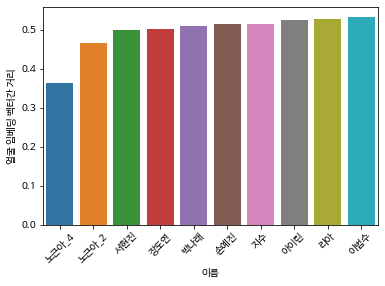

In [166]:
ax = sns.barplot(data=chart_3, x='이름', y='얼굴 임베딩 벡터간 거리')
containers = ax.containers[0]
plt.xticks(rotation=45)
plt.show()

### 6-3. 종합적으로 나와 임베딩 거리 0.5 이내인 연예인은 누구?

#### 앞에서 만든 데이터 프레임을 하나로 합치기(내 이름은 중복되므로 제외), 이후 오름차순 정렬

In [188]:
chart_7 = pd.DataFrame({'이름':['트와이스사나', '트와이스모모', '아이유', '장도연', '사쿠라', 'RM', '제이홉', '케이', '이종석', 
                              '손예진', '지수', '장원영', '장도연', '트와이스사나', '케이', '진', '리아', '서현진', '장도연', '박나래', 
                              '손예진', '지수', '아이린', '리아', '이범수'],
                             '얼굴 임베딩 벡터간 거리':[0.40796800553221396, 0.4085972674219029, 0.41250992059636243, 
                                              0.41893456062475176, 0.42366451927776816, 0.4260489707743963, 0.42605155351413404, 
                                              0.4288543671678471, 0.43042355890420797, 0.3838754703963807, 0.3928444849189283, 
                                              0.4065896434883224, 0.4071291004332894, 0.40799448022771134, 0.4094288693571574, 
                                              0.4099241510408035, 0.41503188498934157, 0.5004278554425166, 0.5028533438438588, 
                                              0.5112536908103582, 0.5141170708474778, 0.5154293325675292, 0.526145410910045, 
                                              0.5291371862745794, 0.5319024035054647]})

chart_7

,이름,얼굴 임베딩 벡터간 거리
0,트와이스사나,0.407968
1,트와이스모모,0.408597
2,아이유,0.412510
3,장도연,0.418935
4,사쿠라,0.423665
5,RM,0.426049
6,제이홉,0.426052
7,케이,0.428854
8,이종석,0.430424
9,손예진,0.383875


In [192]:
total = chart_7.sort_values(by=['얼굴 임베딩 벡터간 거리']).reset_index(drop=True)                            
total

,이름,얼굴 임베딩 벡터간 거리
0,손예진,0.383875
1,지수,0.392844
2,장원영,0.406590
3,장도연,0.407129
4,트와이스사나,0.407968
5,트와이스사나,0.407994
6,트와이스모모,0.408597
7,케이,0.409429
8,진,0.409924
9,아이유,0.412510


# 2. 결론

1. 나와 닮은 연예인을 얼굴 임베딩 벡터간 거리를 통해 구해보았다.      
 내 사진을 세 장 사용했는데(안경 쓰지 않은 사진 2장, 안경 쓴 사진 1장) 사진마다 닮은 연예인의 순위에 차이가 있었다.    
2. 임베딩 거리 0.5 이내에 남자 연예인도 닮았다고 나온다.
3. Pandas와 Matplotlib으로 시각화를 간단히 해 보았다.

# 3. 루브릭 관련 고려한 점

1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.     
닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.     
-> 내 사진 세 장별로 top 5 리스트를 출력하였다.     

2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.     
다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.     
-> 안경 쓴 사진과 쓰지 않은 사진을 비교해 보았다.     

3. 다양하고 재미있는 결과 시각화를 시도하였다.     
matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.     
-> 막대 그래프로 임베딩 거리를 시각화 해보았다.     
-> 판다스 데이터프레임을 만들어 세 장의 사진으로 종합적으로 닮은 연예인(0.5 이내)들을 정렬해 보았다.    

# 4. 탐구 및 시도 모음

### 1. 넘파이의 리스트는 ndim 적용이 되지 않는 것 같다
그럼 몇 차원인지 어떻게 알지?

리스트 안의 숫자들이 벡터로 표현된 것 같은데, 그럼 벡터의 차원수를 구하는 방법을 알아보면?

벡터의 차원은 선형 독립인 벡터들의 수라고 한다!!!

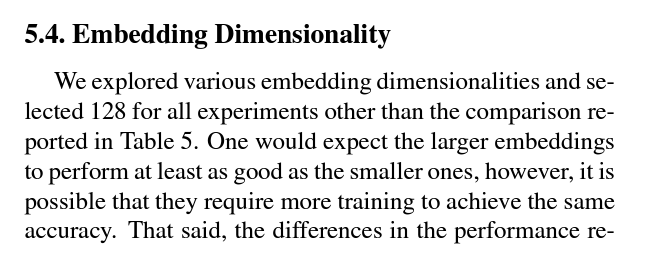

In [4]:
Image("[GD_1_Celeb] images/05.PNG")

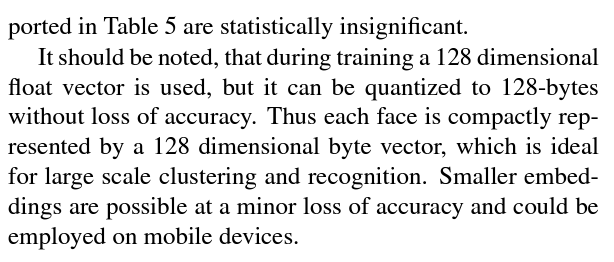

In [5]:
Image("[GD_1_Celeb] images/06.PNG")
출처: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/1503.03832.pdf

### 2. 두 임베딩 벡터간의 거리 구하기

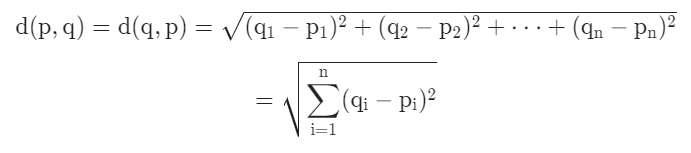

In [7]:
Image("[GD_1_Celeb] images/08.PNG")

In [ ]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

어느 코드 부분에서 리스트를 넘파이 배열로 변환해주었을까? [A, B] 이런 부분?
여기에서 axis = 1은 넘파이 평균등 계산할 때 처럼 그 방향일까?
ord=2의 의미는?

numpy.linalg 모듈은 역행렬, 행렬식(determinant)및 분해(decomposition)함수들을 포함하고 있다고 한다     
출처: https://compmath.korea.ac.kr/appmath/NumpyBasics.html
        
**벡터의 노름**    
벡터의 노름(norm)은 원점에서부터의 거리를 말한다
임의의 차원 d에 대해 성립한다

|| ' || 기호는 노름(norm)이라고 부른다고 한다

L1 노름은 각 성분의 변화량의 절대값을 모두 더한다
L2 노름은 피타고라스 정리를 이용해 유클리드 거리를 계산한다

L1, L2 노름을 이용해 두 벡터 사이의 거리를 계산할 수 있다
두 벡터 사이의 거리를 계산할 때는 벡터의 뺄셈을 이용한다

출처: https://velog.io/@gyuho/Week2-Day6-Numpy-%EB%B2%A1%ED%84%B0-%ED%96%89%EB%A0%AC

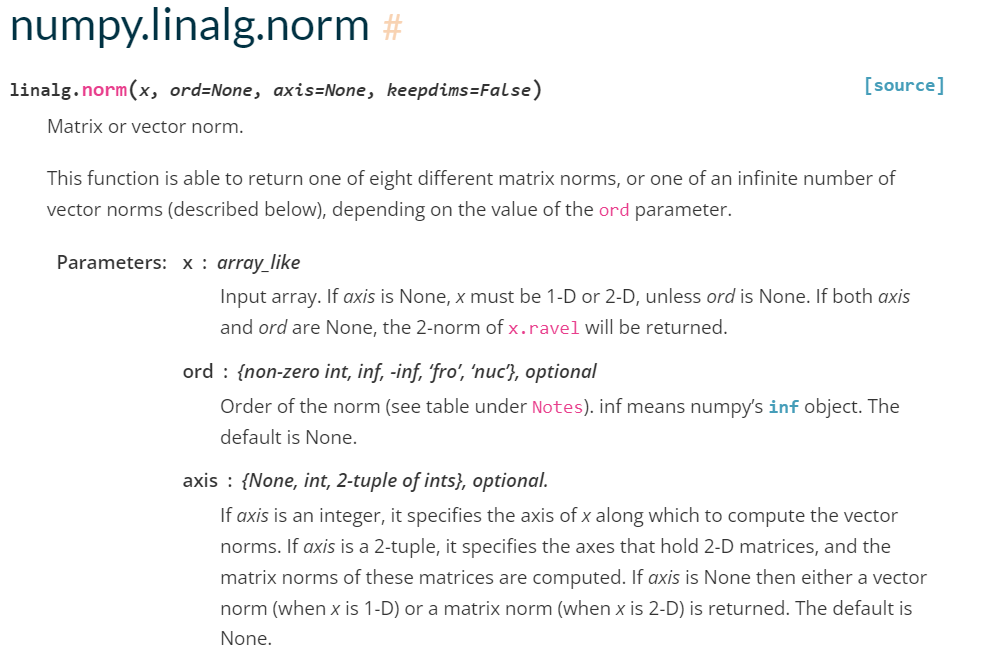

In [8]:
Image("[GD_1_Celeb] images/09.PNG")

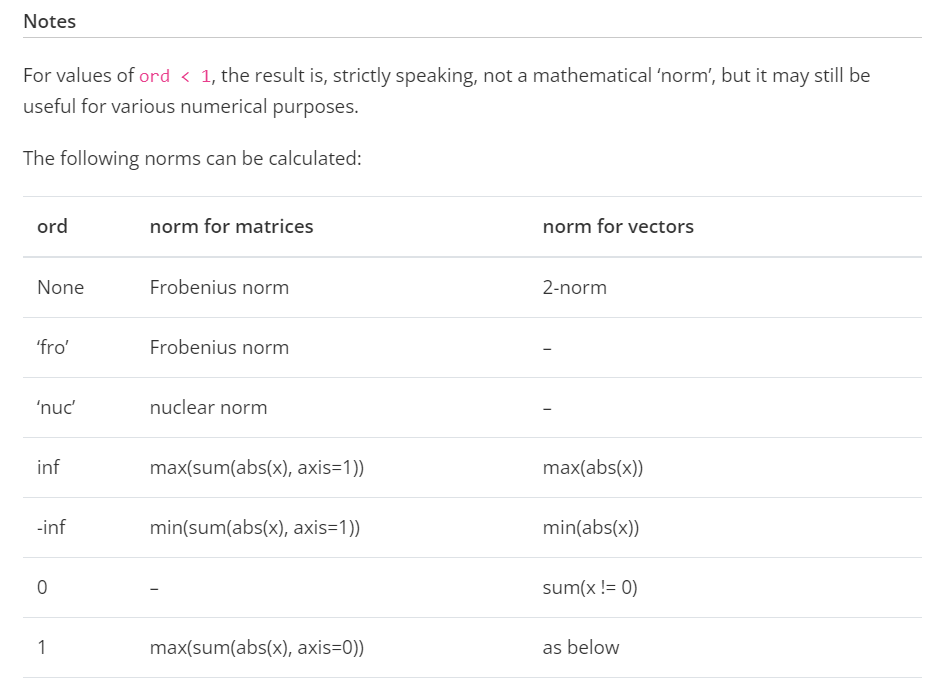

In [9]:
Image("[GD_1_Celeb] images/10.PNG")

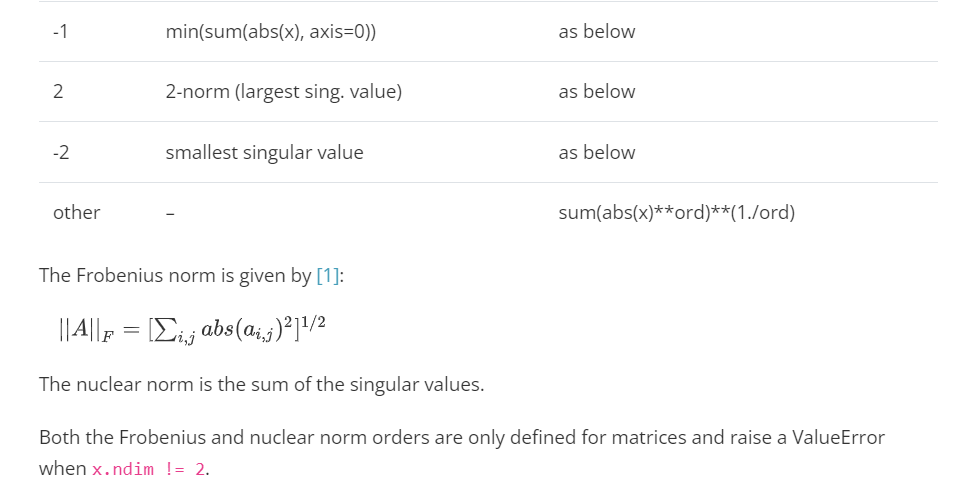

In [10]:
Image("[GD_1_Celeb] images/11.PNG")

### pd. concat을 사용하면 axis에 따라 옆으로, 아래로 데이터프레임을 합칠 수 있다

In [193]:
total_4 = pd.concat([total_1, total_2, total_3], axis = 1)
total_4

,이름,얼굴 임베딩 벡터간 거리,이름,얼굴 임베딩 벡터간 거리,이름,얼굴 임베딩 벡터간 거리
0,트와이스사나,0.407968,손예진,0.383875,서현진,0.500428
1,트와이스모모,0.408597,지수,0.392844,장도연,0.502853
2,아이유,0.412510,장원영,0.406590,박나래,0.511254
3,장도연,0.418935,장도연,0.407129,손예진,0.514117
4,사쿠라,0.423665,트와이스사나,0.407994,지수,0.515429
5,RM,0.426049,케이,0.409429,아이린,0.526145
6,제이홉,0.426052,진,0.409924,리아,0.529137
7,케이,0.428854,리아,0.415032,이범수,0.531902
8,이종석,0.430424,NaN,NaN,NaN,NaN


# 5. 회고

### 1. 프로젝트에서 어려웠던 점, 해결을 위해 시도한 방법, 문제해결에 성공한 이유 또는 실패한 이유

- **프로젝트에서 어려웠던 점**  
    checkpoint 에러때문에 사진을 여러번 폴더를 만들어 업로드해야했던 점

- **해결을 위해 시도한 방법**  
    1. 판다스로 시각화를 해보려고 했어요.
    2. tkinter나 flask를 해보려고 알아봤어요(어려워서 해보지는 못함)

- **문제해결에 성공한 이유 또는 실패한 이유**  
    얼굴 임베딩 딕셔너리 함수에서 '산들'의 이미지가 문제였는데, 게더에서 다른 그루분들이 다같이 이야기 나누어 도움을 받을 수 있었어요.
    
    
### 2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

- **프로젝트를 진행하면서 알아낸 점**  
얼굴 영역 crop, 얼굴 임베딩 벡터로 닮음을 구할 수 있는 점    

- **아직 모호한 점**    
1. .ipynb_checkpoints
IsADirectoryError: [Errno 21] Is a directory: '/aiffel/aiffel/project/first-repository/face_embedding_images/images1/.ipynb_checkpoints'

ChatGPT에 찾아보니, 쥬피터 노트북을 사용하며 자동적으로 저장이 되는 거라고 하는데,        
사진을 지우면 저 에러로 인해 폴더를 아예 새로 만들어야 하는 경우가 많았어요. 

for entry in os.scandir(dir_path):
    if entry.is_file():
        # Process the file
        print(entry.name)
        
이런 방법도 있던데.. 새폴더를 만드는 방법말고 다른 방법도 알고 싶어요.

2. 사진을 업로드 할 때
aiffel/face_embedding/images에 업로드하려고 하니 안돼요.     
대신 aiffel/project/first-repository/face_embedding_images(새로 만듦)/images(새로 만듦)에 업로드하니 되는데.. 왜 그럴까요?


### 3. 자기 다짐, 프로젝트를 진행하면서 느낀 점

1. 작지만 시각화를 스스로 여러가지 해 본 것이 뿌듯해요.
2. 재미있는 프로젝트였어요, 얼굴 임베딩 벡터에 대해서도 많이 배웠습니다.

# 6. References

벡터의 차원     
https://msmskim.tistory.com/61    
    
facenet 논문     
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/1503.03832.pdf

numpy.linalg      
https://compmath.korea.ac.kr/appmath/NumpyBasics.html

벡터 l1, l2 노름 계산에 대한 글이 잘 정리되어 있다     
https://velog.io/@gyuho/Week2-Day6-Numpy-%EB%B2%A1%ED%84%B0-%ED%96%89%EB%A0%AC

128차원 벡터 시각화     
https://huyhoang17.github.io/128D-Facenet-LFW-Embedding-Visualisation/
   
노드 공유_pca등에 대한 자세한 설명   
https://bcho.tistory.com/1209?category=555440

데이터프레임 만들기     
https://mizykk.tistory.com/15

데이터프레임 합치기 pd.concat    
https://mizykk.tistory.com/126